In [2]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sb

date = pickle.load(open(r'E:\Git\ML\Kaggle_Bosch\Data\train_minmax.pkl', 'rb'))

date = date.iloc[:500000,:]

num = pd.read_csv(r'E:\Git\ML\Kaggle_Bosch\Data\train_numeric.csv', nrows=500000)

data = num.merge(date, on =['Id'])

data.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,S35_Max,S8_Max,S13_Max,S11_Max,S38_Max,S43_Max,S29_Max,S34_Max,S45_Max,Duration
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,82.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.29
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1315.75
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,1618.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1624.42
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,1149.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1154.16
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,602.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606.02


In [4]:
pos = data[data['Response']==1]


min = pos.min(axis=0)
max = pos.max(axis=0)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

c = 'L3_S30_F3759'

features = [f for f in data.columns.values if f.startswith('L')]

for c in features[:100]:
    try:
        _, ax = plt.subplots(1,1,figsize=(15,4))
        ax.set_title(c)
        data[(data[c] > min[c]) & (data[c] < max[c]) & (data['Response']==1)][c].plot.hist(alpha=0.4, color='r', ax=ax, bins=200, log=True)
        data[(data[c] > min[c]) & (data[c] < max[c]) & (data['Response']==0)][c].plot.hist(alpha=0.4, color='b', ax=ax,bins=200, log=True)

        #plt.show()
        break
    except:
        continue
    
    

NameError: name 'data' is not defined

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sb


leak = pickle.load(open(r'E:\Git\ML\Kaggle_Bosch\Data\train_leak.pkl', 'rb'))


t1 = pd.read_csv(r'E:\Git\ML\Kaggle_Bosch\Data\train_numeric.csv', usecols=['Id','Response'])

t = pd.merge(leak, t1, on=['Id'])
t.head()

,index,Id,IdDiff,IdDiffReverse,SortedIdDiff,SortedIdDiffReverse,Response
0,0,4,-2367490.0,-2.0,-2314450.0,-224451.0,0
1,1,6,2.0,-1.0,-2284042.0,-67530.0,0
2,2,7,1.0,-2.0,-2313512.0,-26876.0,0
3,3,9,2.0,-2.0,-2196581.0,-3564.0,0
4,4,11,2.0,-2.0,-2226678.0,-1.0,0


In [ ]:
import matplotlib.pyplot as plt
_,ax = plt.subplots(1,1, figsize=(15,4))
t[(t['Response']==1)]['SortedIdDiff'].plot.hist(alpha=0.4, color='r', bins=100, ax=ax, log=True)
t[(t['Response']==0)]['SortedIdDiff'].plot.hist(alpha=0.4, color='b', bins=100, ax=ax,log=True)
plt.show()

In [4]:
t['leak1'].describe()

count    2.367494e+06
mean     9.940232e-01
std      6.972539e+04
min     -2.367493e+06
25%      1.000000e+00
50%      1.000000e+00
75%      7.000000e+00
max      2.305582e+06
Name: leak1, dtype: float64

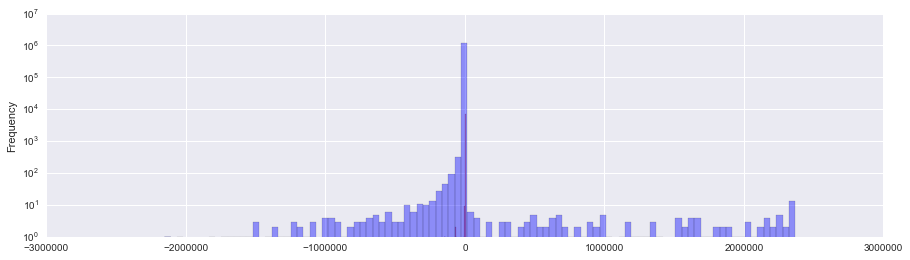

In [38]:
_,ax = plt.subplots(1,1, figsize=(15,4))
t[(t['Response']==1) ]['leak2'].plot.hist(alpha=0.4, color='r', bins=100, ax=ax, log=True)
t[(t['Response']==0)]['leak2'].plot.hist(alpha=0.4, color='b', bins=100, ax=ax,log=True)
plt.show()

In [14]:
# Temp
import scipy.stats
import pickle
train = pickle.load(open(r'E:\Git\ML\Kaggle_Bosch\Data\WithInter1\train.pkl', 'rb'))


In [30]:
import numpy as np
top = ['SortedIdDiff', 'minDefectRate', 'SortedIdDiffReverse', 'avg_nbRowsR1', 'avg_DefectRate', 'maxDefectRate', 'maxnbRowsR1', 'durationTS', 'N_47', 'L3_S30_F3754_max', 'RN_58', 'L3_S30_F3759', 'L3_S33_F3857_max', 'L0_S0_F20_max', 'L3_S36_F3920', 'L0_S1_F28', 'L3_S30_F3754', 'L3_S30_F3809', 'Station_32_minStationDefectRate', 'L3_S33_F3859', 'L3_S33_F3857', 'L3_S30_F3604', 'L3_S30_F3769', 'L3_S30_F3609', 'L3_S29_F3373', 'L3_S30_F3804', 'MeanResponse', 'L3_S29_F3376', 'L0_S0_F2', 'L3_S30_F3574', 'L3_S33_F3865_max', 'L0_S0_F20', 'L3_S36_F3920_max', 'L3_S29_F3354', 'L3_S29_F3321', 'all_Max', 'RN_81', 'L3_S30_F3609_max', 'L3_S30_F3574_max', 'L3_S30_F3494', 'Station_38_minStationDefectRate', 'L3_S29_F3351_max', 'L0_S6_F132', 'L3_S33_F3859_max', 'S35_Max', 'L3_S32_F3854', 'S32_Max', 'L3_S30_F3554', 'L0_S1_F28_max', 'L3_S30_F3524', 'S36_Max', 'L0_S11_F294_max', 'L3_S30_F3554_max', 'L3_S29_F3479_max', 'L0_S2_F60', 'L3_S29_F3479', 'L3_S33_F3865', 'S4_Min', 'S6_Max', 'L3_S29_F3342', 'L3_S30_F3769_max', 'L3_S29_F3324', 'L3_S29_F3373_max', 'L3_S30_F3809_max', 'L3_S30_F3804_max', 'L0_S0_F18', 'IdDiffReverse', 'L3_S29_F3351', 'L3_S38_F3960', 'L3_S35_F3889', 'L0_S2_F60_max', 'L3_S30_F3544', 'L0_S13_F356_max', 'L0_S0_F16', 'S1_Min', 'Station_35_minStationDefectRate', 'L0_S6_F122', 'L3_S29_F3382', 'L0_S5_F116_max', 'S38_Max', 'Station_34_minStationDefectRate', 'S5_Min', 'Station_34_minNbStationItemsR1', 'L2_S26_F3069', 'L0_S19_F455_max', 'L0_S2_F44', 'L0_S9_F165', 'L0_S10_F259', 'S2_Min', 'L1_S24_F1844_L1_S24_F1723', 'L0_S7_F138', 'L3_S29_F3330', 'L3_S30_F3494_max', 'S1_Max', 'L3_S30_F3704', 'S48_Max', 'IdDiff', 'S7_Max', 'L0_S18_F439_max', 'L0_S7_F138_max', 'L0_S9_F165_max', 'L3_S29_F3327', 'L0_S10_F219', 'L3_S30_F3544_max', 'L0_S0_F18_max', 'S34_Max', 'L1_S24_F1632_L1_S24_F1667', 'L0_S11_F294', 'L0_S5_F116', 'L3_S30_F3689_max', 'S44_Max', 'L3_S29_F3336', 'L0_S12_F350', 'S3_Min', 'S29_Max', 'Duration', 'L2_S27_F3210', 'L0_S10_F244', 'L0_S3_F100_max', 'S33_Max', 'L2_S26_F3073', 'L2_S26_F3113', 'L1_S24_F1844', 'L2_S26_F3073_max', 'L0_S5_F114', 'L0_S15_F418', 'L0_S6_F122_max', 'L3_S29_F3436', 'Station_33_minNbStationItemsR1', 'L0_S6_F132_max', 'L1_S24_F1632_L1_S24_F1842', 'L2_S26_F3036', 'L2_S26_F3047_max', 'L3_S29_F3382_max', 'Station_33_minStationDefectRate', 'L0_S10_F259_max', 'L3_S30_F3564', 'L0_S0_F22', 'L3_S30_F3504', 'L3_S29_F3430', 'L3_S29_F3330_max', 'S24_Min', 'L1_S24_F1778_max', 'L0_S0_F10_max', 'S27_Max', 'L3_S32_F3850', 'S30_Max', 'L3_S30_F3689', 'RN_86', 'minTS', 'L1_S24_F1846_L1_S24_F1667', 'L3_S29_F3327_max', 'L2_S26_F3117', 'Station_26_minStationDefectRate', 'S26_Max', 'L1_S24_F1571', 'L0_S17_F433', 'L1_S24_F1565', 'S23_Max', 'L0_S3_F100', 'L2_S27_F3210_max', 'S21_Max', 'L2_S27_F3140_max', 'L0_S2_F44_max', 'S24_Diff', 'L3_S29_F3342_max', 'S13_Max', 'L2_S26_F3062', 'L0_S14_F370', 'L3_S38_F3956', 'L0_S0_F2_max', 'S22_Max', 'L2_S26_F3121', 'L0_S14_F370_max', 'S1_Diff', 'L2_S26_F3047', 'S0_Max', 'S8_Max', 'L0_S12_F350_max', 'L0_S17_F433_max', 'L0_S0_F10', 'S9_Max', 'L0_S15_F403', 'L1_S24_F1632_L1_S24_F1844', 'S37_Max', 'L2_S26_F3121_max', 'L3_S29_F3336_max', 'S51_Max', 'L2_S27_F3129_max', 'TL3_S32_F3854', 'L3_S29_F3461', 'L3_S33_F3855_max', 'L0_S10_F219_max', 'S40_Max', 'L2_S26_F3062_max', 'T2', 'S19_Max', 'S14_Max', 'L2_S27_F3133_max', 'all_Min', 'L1_S24_F1632', 'L2_S27_F3133', 'L1_S24_F1695_L1_S24_F1723', 'Station_24_minStationDefectRate', 'L2_S27_F3140', 'L2_S26_F3036_max', 'S2_Diff', 'L0_S13_F356', 'L3_S29_F3407', 'L1_S24_F1632_L1_S24_F1604', 'L2_S27_F3129', 'L0_S10_F244_max', 'L1_S24_F1672', 'L2_S27_F3144', 'L3_S29_F3461_max', 'L1_S24_F1581', 'L3_S29_F3407_max', 'L1_S24_F1846_max', 'L1_S24_F1667', 'S24_Max', 'L3_S40_F3986', 'S3_Max', 'Station_34_maxStationDefectRate', 'L1_S24_F1842', 'Station_38_minNbStationItemsR1', 'S20_Max', 'S4_Max', 'L1_S24_F1846_L1_S24_F1604', 'L3_S40_F3980', 'L0_S14_F374_max', 'L0_S15_F403_max', 'nbHashR1', 'Station_32_maxStationDefectRate', 'L1_S24_F1846_L1_S24_F1695', 'L0_S23_F671_max', 'S18_Max', 'L0_S18_F439', 'S5_Max', 'L1_S25_F1852', 'L1_S24_F1778', 'L1_S24_F1672_L1_S24_F1844', 'Station_32_minNbStationItemsR1', 'L1_S25_F2099', 'L0_S19_F455', 'L1_S24_F1723_L1_S24_F1844', 'S15_Max', 'L1_S24_F1565_max', 'L2_S27_F3144_max', 'L1_S24_F1846', 'L3_S43_F4080', 'L1_S24_F1647_max', 'L3_S29_F3458', 'L1_S24_F1842_L1_S24_F1632', 'L1_S24_F1842_L1_S24_F1723', 'S2_Max', 'L0_S15_F418_max', 'S16_Max', 'S49_Max', 'L3_S32_F3850_max', 'L1_S24_F1723_max', 'S3_Diff', 'Station_32_avgStationDefectRate', 'L1_S24_F1647', 'L3_S29_F3475', 'L1_S24_F1844_L1_S24_F1632', 'L3_S33_F3855', 'L1_S24_F1632_max', 'L1_S24_F1137', 'L1_S24_F1723_L1_S24_F1695', 'L1_S24_F1667_L1_S24_F1846', 'L3_S29_F3370', 'S4_Diff', 'L1_S24_F1667_L1_S24_F1632', 'L0_S23_F671', 'L0_S23_F619', 'L2_S28_F3285', 'L0_S14_F374', 'L3_S38_F3952_max', 'L1_S24_F1838', 'L3_S38_F3952', 'L1_S24_F1844_L1_S24_F1672', 'L3_S29_F3412', 'L3_S29_F3317', 'L1_S24_F1695_L1_S24_F1846', 'Station_33_maxNbStationItemsR1', 'L1_S24_F1647_L1_S24_F1604', 'S5_Diff', 'L1_S25_F1981', 'Station_33_maxStationDefectRate', 'L1_S24_F1569', 'L3_S34_F3882_max', 'L3_S34_F3882', 'L1_S24_F1114', 'L3_S29_F3467', 'previousResponse', 'L1_S25_F2141', 'Station_24_avgStationDefectRate', 'L1_S24_F1723_L1_S24_F1842', 'L1_S25_F1903', 'L3_S41_F4016', 'L3_S33_F3861', 'L1_S24_F1191', 'L3_S29_F3478', 'L1_S24_F1604_L1_S24_F1632', 'L1_S24_F1140', 'L1_S24_F1604_L1_S24_F1846', 'nextResponse', 'L1_S24_F1838_max', 'L1_S24_F710', 'L1_S24_F1282', 'L1_S25_F2968', 'L3_S33_F3863', 'L1_S25_F3013', 'S25_Max', 'L1_S25_F1907', 'L1_S25_F2229', 'L2_S28_F3224', 'S17_Max', 'L1_S25_F2958', 'L3_S29_F3332', 'L1_S24_F1604_max', 'S12_Max', 'L1_S25_F2802', 'L3_S29_F3323', 'L1_S24_F1695', 'L3_S32_F3851', 'S45_Max', 'L1_S25_F1912', 'L1_S24_F1530', 'L2_S27_F3131', 'L1_S24_F705', 'S50_Max', 'S42_Max', 'L3_S34_F3878', 'L1_S24_F675', 'L3_S34_F3876', 'L1_S24_F1525', 'L1_S24_F703', 'L1_S24_F1604', 'S28_Max', 'L1_S24_F1723', 'L1_S24_F1604_L1_S24_F1647', 'L1_S25_F2811', 'L1_S24_F823', 'L1_S25_F2880', 'S41_Max', 'S39_Max', 'L1_S25_F1922', 'L1_S24_F1510', 'L1_S24_F1695_max', 'L3_S29_F3326', 'L3_S29_F3481', 'L1_S25_F2884', 'S10_Max', 'L2_S27_F3192', 'L1_S24_F1523', 'L1_S24_F1679', 'L1_S25_F2779', 'L1_S25_F2104', 'S43_Max', 'L1_S24_F1187', 'S47_Max', 'L1_S24_F1278', 'L1_S25_F1927', 'L2_S28_F3228', 'S46_Max', 'maxTS', 'L1_S25_F2963', 'S11_Max', 'L2_S26_F3099', 'L1_S25_F2119', 'L1_S24_F1675', 'S31_Max', 'L3_S29_F3320']

count = 0
output = []
for t in top:
    v = (train[t])# - train[t].mean()) / (train[t].max() - train[t].min())
    output.append((count, t, abs(scipy.stats.pearsonr(v, train['label'])[0])))
    count = count+1
    
    #print(t, scipy.stats.pearsonr(train[t], train['label'])[0])
    
output =  [x for x in output if x[2] > 0]
    
for o in sorted(output, key=lambda x: x[2], reverse=True):
    print(o)

    


(26, 'MeanResponse', 0.1945942003855555)
(231, 'nbHashR1', 0.12889026219127425)
(18, 'Station_32_minStationDefectRate', 0.11204511596358714)
(232, 'Station_32_maxStationDefectRate', 0.11204511596358714)
(261, 'Station_32_avgStationDefectRate', 0.11204511596358714)
(241, 'Station_32_minNbStationItemsR1', 0.1040785769047549)
(202, 'L1_S24_F1695_L1_S24_F1723', 0.079690437383610563)
(268, 'L1_S24_F1723_L1_S24_F1695', 0.079690437383610563)
(325, 'L3_S32_F3851', 0.079569352804387733)
(145, 'L3_S32_F3850', 0.074816621122178364)
(258, 'L3_S32_F3850_max', 0.072767570682042537)
(306, 'nextResponse', 0.067965721433663556)
(294, 'previousResponse', 0.067336527431485882)
(4, 'avg_DefectRate', 0.065571017899661396)
(1, 'minDefectRate', 0.062877496307723879)
(227, 'L1_S24_F1846_L1_S24_F1604', 0.062216164217174207)
(305, 'L1_S24_F1604_L1_S24_F1846', 0.062216164217174207)
(233, 'L1_S24_F1846_L1_S24_F1695', 0.06208730629800549)
(283, 'L1_S24_F1695_L1_S24_F1846', 0.06208730629800549)
(5, 'maxDefectRate',

In [33]:
train.iloc[:,1]

0          1.940
1          1.959
2          2.115
3          2.057
4          2.004
6          1.911
7          2.064
8          2.022
10         2.003
12         2.017
14         1.969
17         2.032
18         2.037
19         1.990
20         1.971
21         2.116
22         2.050
25         2.003
27         2.011
28         2.002
29         1.999
30         2.024
31         2.136
32         2.048
33         1.975
34         1.967
35         1.917
37         2.016
38         1.989
40         1.995
           ...  
1183712    2.000
1183713    2.027
1183714    1.982
1183715    1.982
1183716    2.031
1183717    2.031
1183718    1.934
1183719    1.984
1183720    1.963
1183721    2.078
1183722    2.008
1183723    1.955
1183725    2.000
1183727    2.003
1183729    2.057
1183731    1.993
1183732    2.095
1183733    1.994
1183734    1.944
1183735    2.027
1183736    1.955
1183737    2.020
1183738    1.986
1183740    2.031
1183741    1.941
1183742    1.985
1183743    2.063
1183744    1.9

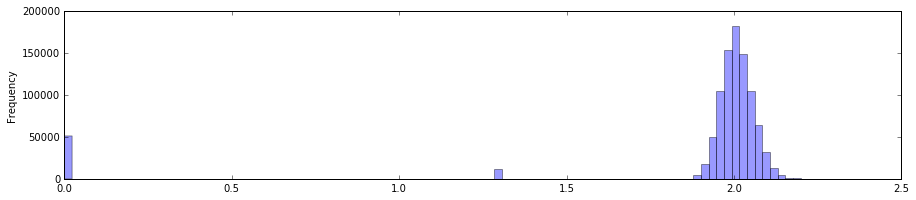

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

_, ax = plt.subplots(1,1, figsize=(15,3))
train['L3_S30_F3809'].plot.hist(ax=ax, alpha=0.4, bins=100)

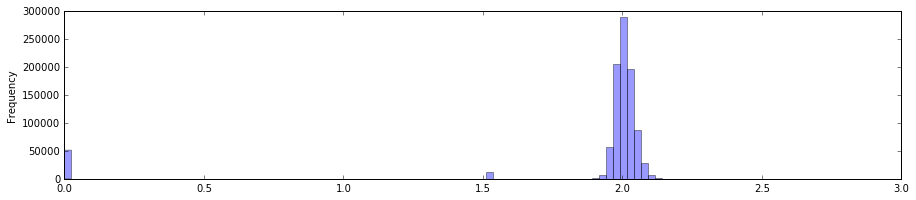

In [11]:

_, ax = plt.subplots(1,1, figsize=(15,3))
train['L3_S30_F3769'].plot.hist(ax=ax, alpha=0.4, bins=100)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle




train = pickle.load(open(r'E:\Git\ML\Kaggle_Bosch\Data\train_minmax.pkl','rb'))
test  = pickle.load(open(r'E:\Git\ML\Kaggle_Bosch\Data\test_minmax.pkl','rb'))

cols = [c for c in train.columns.values if c.startswith('S') and '_M' in c]
print(cols)

train['all_Min'] = train[cols].apply(np.min, axis=1)
test['all_Min'] = test[cols].apply(np.min, axis=1)
del train['all_Max']
del test['all_Max']

trainM = pickle.load(open(r'E:\Git\ML\Kaggle_Bosch\Data\train_leak2.pkl','rb'))
testM = pickle.load(open(r'E:\Git\ML\Kaggle_Bosch\Data\test_leak2.pkl','rb'))

x = pd.concat((pd.merge(train, trainM, on=['Id']), pd.merge(test, testM, on=['Id'])))



['S7_Max', 'S19_Max', 'S29_Max', 'S40_Max', 'S44_Max', 'S21_Max', 'S27_Max', 'S35_Max', 'S13_Max', 'S16_Max', 'S37_Max', 'S49_Max', 'S48_Max', 'S30_Max', 'S14_Max', 'S34_Max', 'S46_Max', 'S33_Max', 'S24_Min', 'S24_Max', 'S32_Max', 'S42_Max', 'S15_Max', 'S20_Max', 'S23_Max', 'S51_Max', 'S4_Min', 'S4_Max', 'S26_Max', 'S18_Max', 'S38_Max', 'S6_Max', 'S36_Max', 'S22_Max', 'S1_Min', 'S1_Max', 'S5_Min', 'S5_Max', 'S3_Min', 'S3_Max', 'S39_Max', 'S11_Max', 'S50_Max', 'S9_Max', 'S31_Max', 'S41_Max', 'S47_Max', 'S10_Max', 'S2_Min', 'S2_Max', 'S0_Max', 'S17_Max', 'S25_Max', 'S28_Max', 'S12_Max', 'S43_Max', 'S45_Max', 'S8_Max']


In [30]:

def firstStation(row):
    global cols
    for c in cols:
        if not np.isnan(row[c]):
            return c
    return np.nan

x['FirstStation'] = x.apply(firstStation, axis=1)

In [43]:
y= x[['FirstStation', 'all_Min', 'Id']].sort(['FirstStation', 'all_Min', 'Id'])

C:\Users\serajago\AppData\Local\Continuum2\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [47]:

train = pickle.load(open(r'E:\Git\ML\Kaggle_Bosch\Data\train_minmax.2.pkl','rb'))
test  = pickle.load(open(r'E:\Git\ML\Kaggle_Bosch\Data\test_minmax.2.pkl','rb'))

0            82.24
1          1313.12
2          1618.70
3          1149.20
4           602.64
5          1331.66
6          1662.63
7           791.22
8           517.64
9           156.27
10         1104.78
11          392.85
12           55.44
13           98.99
14          354.51
15         1633.80
16          476.06
17         1532.42
18          263.21
19          675.84
20          966.77
21         1341.05
22          886.18
23          609.56
24          656.22
25         1450.09
26          187.57
27         1458.06
28         1293.17
29          319.66
            ...   
1183717    1567.97
1183718     770.35
1183719     486.82
1183720     340.58
1183721     790.44
1183722     674.23
1183723    1394.35
1183724     888.00
1183725     113.90
1183726     989.02
1183727    1190.65
1183728    1249.57
1183729     752.61
1183730     606.18
1183731     354.40
1183732     795.44
1183733    1585.25
1183734    1412.87
1183735     155.86
1183736     896.98
1183737     476.03
1183738    1